# Principal Component Analysis (PCA)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set()

In [5]:
rnd_num = np.random.RandomState(42)
X = np.dot(rnd_num.rand(2,2), rnd_num.randn(2,500)).T

In [6]:
X[:,0] = -X[:,0]

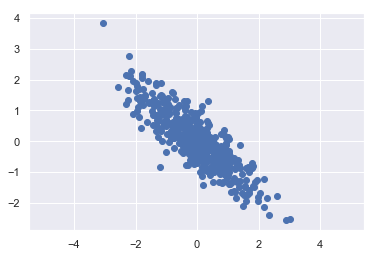

In [8]:
plt.scatter(X[:,0], X[:,1]);
plt.axis('equal');

## Principal Component Identification

In [10]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [14]:
print(pca.components_)

[[-0.74062812  0.67191517]
 [-0.67191517 -0.74062812]]


In [15]:
print(pca.explained_variance_)

[1.62123504 0.12581594]


In [16]:
print(pca.explained_variance_ratio_)

[0.92798382 0.07201618]


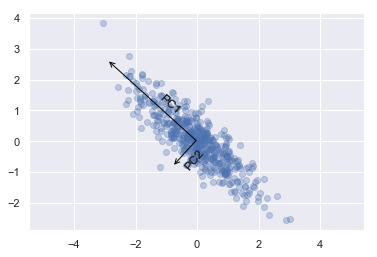

In [19]:
plt.scatter(X[:,0], X[:,1], alpha=0.3)

# plot data

for k,v in zip(pca.explained_variance_, pca.components_):
    vec = v * 3 * np.sqrt(k)
    
    ax = plt.gca()
    arrowprops = dict(arrowstyle = '<-',
                     linewidth = 1,
                     shrinkA=0, shrinkB=0, color='black')
    ax.annotate('', pca.mean_, pca.mean_ + vec, arrowprops = arrowprops)
    ax.text(-0.90, 1.2, 'PC1', ha='center', va='center', rotation=-42, size=12)
    ax.text(-0.1, -0.6, 'PC2', ha='center', va='center', rotation=50, size=12)
plt.axis('equal');

## Dimensionality Reduction w/ PCA

In [20]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)

In [21]:
X.shape

(500, 2)

In [22]:
X_pca.shape

(500, 1)

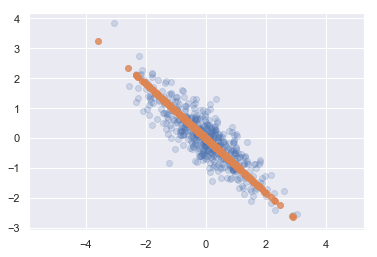

In [24]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:,0], X[:,1], alpha=0.2)
plt.scatter(X_new[:,0], X_new[:,1], alpha=0.8)
plt.axis('equal');